# Vacinação Geral no Brasil

Projeto avaliando brevemente quais as vacinas mais aplicadas nos brasileiros de 1994 a 2019 utilizando os dados do DATASUS.
Tentarei ver se existe prevalência de alguma vacina específica por região ou estado do país.

# Importação das Bibliotecas e Configurações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# formatar os números para mostrarem duas casa decimais
pd.options.display.float_format = '{:.2f}'.format

# configurações de cores
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configurações da fonte utilizada nos gráficos
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.it'] = 'Arial:italic'

# Limpeza dos Dados

link do notebook

# Panorama Geral

Vamos inicialmente dar um panorama geral de como andam as coberturas vacinais no país, além de analisarmos quais as vacinas mais aplicadas em números absolutos.

**Hipótese 1**
- A cobertura vacinal vem crescendo anualmente em todo o país.
**Hipótese 2**
- Vacinas que devem ser aplicar em bebês logo após o nascimento, como a [BCG e da Hepatite B](https://www.unimedlondrina.com.br/noticias/tudo-saude/07/06/2018/vacinas-importantes-recem-nascidos/), principalmente, possuem maior cobertura vacinal e também maior valor absoluto de apliacações.

## Cobertura Vacinal por Região do Brasil, de 1994 a 2019

Aqui consideramos a cobertura vacinal de todos os imunizantes analisados juntos.

Como já fizemos a limpeza anteriormente, podemos já importar o dataset e analisá-lo.

In [3]:
cv_reg = pd.read_csv('../dados/clean/cv_reg.csv', encoding = 'ISO-8859-1', index_col = 'Unnamed: 0')

In [4]:
cv_reg.head()

,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Total
1994,31.03,40.52,55.22,51.60,25.84,38.27
1995,41.67,43.78,46.43,51.24,45.10,45.70
1996,55.20,50.91,44.66,53.84,52.54,50.00
1997,68.57,65.71,70.58,71.50,69.92,68.95
1998,73.28,66.45,74.42,65.09,76.53,70.65


A coluna ```Total``` refere-se à média das 5 regiões, então podemos usá-la como métrica para avalliar a cobertura vacinal do país levando em consideração todas as vacinas disponíveis na base de dados.

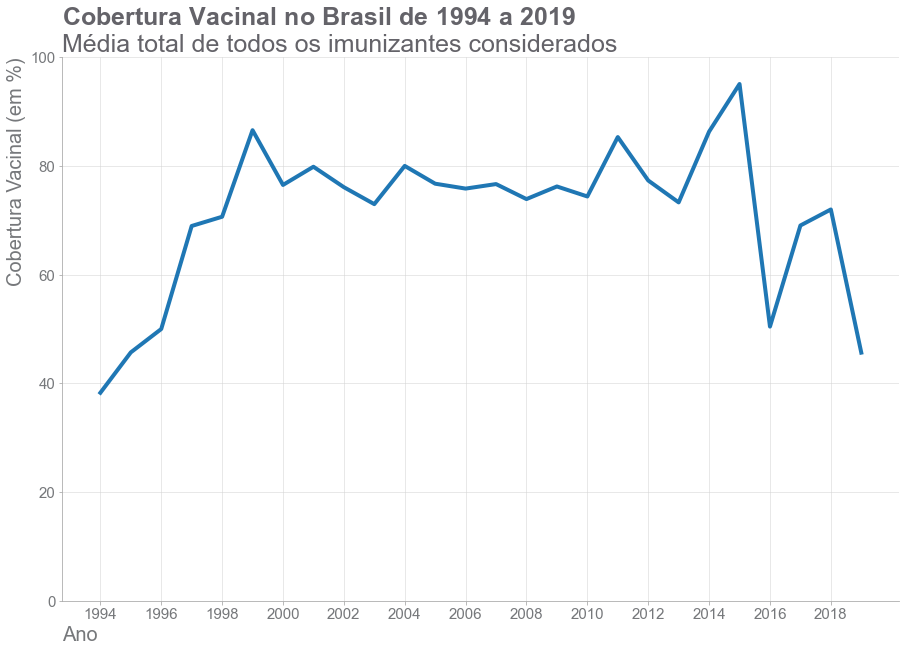

In [55]:
ax = cv_reg['Total'].plot(figsize = (15, 10), linewidth = 4)
plt.ylim(0, 100)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.title('$\\bf{Cobertura\ Vacinal\ no\ Brasil\ de\ 1994\ a\ 2019}$\nMédia total de todos os imunizantes considerados',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Cobertura Vacinal (em %)', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

ax.set_xticks(range(1994, 2020, 2))

plt.grid(color = 'lightgrey', linewidth = 0.5)

plt.show()

Algumas considerações e observações que obtemos não só desse gráfico, mas também do conhecimento que temos da base de dados:
- Os dados foram atualizados pela última vez em **04/09/2019**, como visto no próprio site. Ou seja, as informações sobre 2019 estão incompletas.
- O que aconteceu em **2016** que explique uma **queda tão brusca** na cobertura vacinal? Pelo nosso conhecimento dessa base de dados do Governo, sabemos que os dados sofreram diversão mudanças de infraestrutura ao longo dos anos, até mesmo com inserção duplicada de valores. Isso tudo é explicado nas notas de rodapé do site de onde os dados brutos foram retirados. Então esse ano atípico de 2016 pode muito bem ser explicado por **inconsistências** na base de dados.

De **1994 até 2015**, aproximadamente, parece que temos dados mais consistentes. Vamos então observar esse período de tempo.

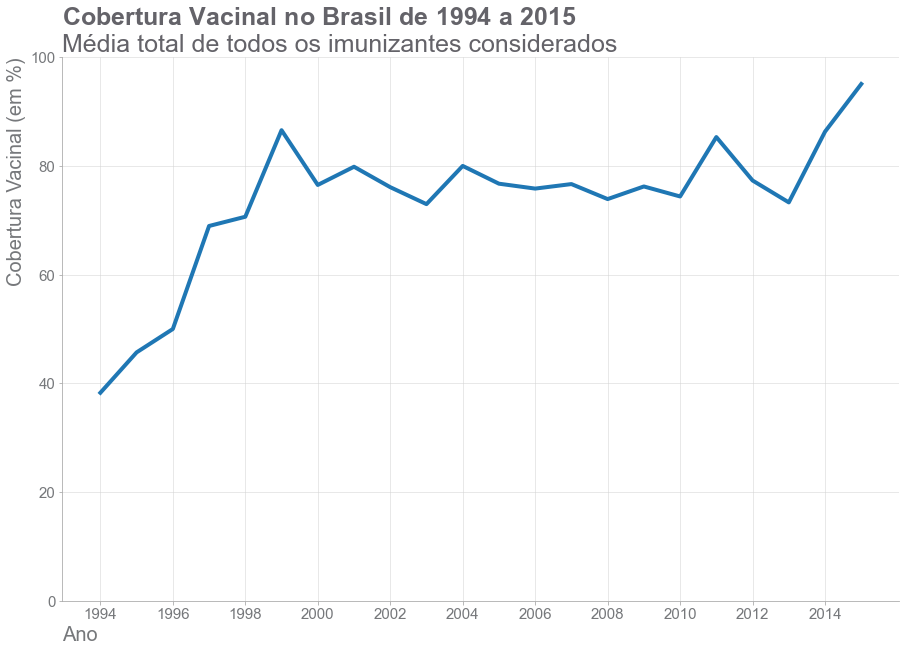

In [56]:
ax = cv_reg[:-4]['Total'].plot(figsize = (15, 10), linewidth = 4)
plt.ylim(0, 100)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.title('$\\bf{Cobertura\ Vacinal\ no\ Brasil\ de\ 1994\ a\ 2015}$\nMédia total de todos os imunizantes considerados',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Cobertura Vacinal (em %)', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

ax.set_xticks(range(1994, 2016, 2))

plt.grid(color = 'lightgrey', linewidth = 0.5)
    
plt.show()

Agora fica mais fácil observar como se comporta a cobertura vacinal no Brasil nesse período. De 1994 a 1999, é evidente que houve uma alta na porcentagem analisada. De 1999 a 2013, houve uma certa estabilidade nesse valor, apenas com um pequeno aumento em 2011. A partir de 2013 até 2015, já voltamos a ter uma subida na cobertura vacinal.

**Seria isso suficiente para responder à nossa Hipótese 1 de que a cobertura vacinal vem crescendo anualmente em todo o país?**
Não, pois, por mais que tenhamos saído de uma média de menos de 40% em 1994 e chegado a quase 100% em 2015, de um ano para o outro também ocorreram diversas quedas nesse número. No geral sim, houve um expressivo aumento na cobertura vacinal de 1994 a 2015, mas não anualmente, e sim como um todo.

1994   38.27
1995   45.70
1996   50.00
1997   68.95
1998   70.65
1999   86.57
2000   76.50
2001   79.85
2002   76.09
2003   72.97
2004   80.00
2005   76.73
2006   75.83
2007   76.66
2008   73.90
2009   76.22
2010   74.38
2011   85.31
2012   77.32
2013   73.29
2014   86.31
2015   95.07
Name: Total, dtype: float64